<a href="https://colab.research.google.com/github/jyotidabass/Grid-World-Example-Q-Learning/blob/main/Grid_World_Example_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

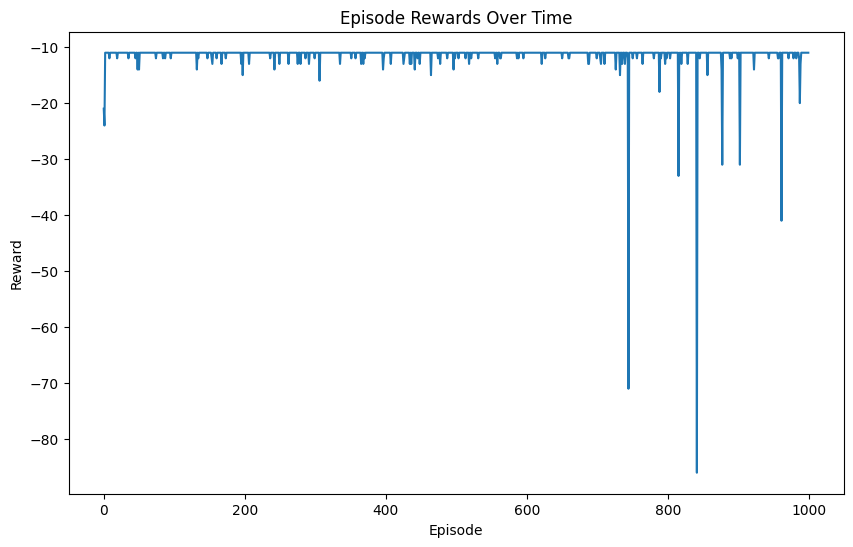

Optimal Policy:
State (0, 0): down
State (0, 1): down
State (0, 2): down
State (0, 3): down
State (0, 4): up
State (1, 0): right
State (1, 1): left
State (1, 2): up
State (1, 3): up
State (1, 4): up
State (2, 0): right
State (2, 1): down
State (2, 2): down
State (2, 3): up
State (2, 4): up
State (3, 0): up
State (3, 1): up
State (3, 2): up
State (3, 3): up
State (3, 4): up
State (4, 0): up
State (4, 1): up
State (4, 2): up
State (4, 3): up
State (4, 4): up

Q-values:
State (0, 0): [-0.99661861  0.         -0.9282102   0.        ]
State (0, 1): [-0.1         0.         -0.1        -0.90152291]
State (0, 2): [-0.97218716  0.         -0.1        -0.1       ]
State (0, 3): [-0.19  0.    0.    0.  ]
State (0, 4): [0. 0. 0. 0.]
State (1, 0): [-0.65132156 -1.         -0.96566316  0.        ]
State (1, 1): [ -7.45813417  -9.0152291    0.         -10.        ]
State (1, 2): [ 0.         -0.97218716  0.          0.        ]
State (1, 3): [ 0.  -0.1  0.  -0.1]
State (1, 4): [0. 0. 0. 0.]
State (2

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the grid world
grid_size = 5
obstacles = [(1, 1), (2, 2), (3, 3)]

# Define the agent's actions
actions = ['up', 'down', 'left', 'right']

# Map actions to integer indices
action_map = {'up': 0, 'down': 1, 'left': 2, 'right': 3}

# Define the rewards
rewards = {'goal': 10, 'obstacle': -10,'step': -1}

# Initialize the Q-values
q_values = np.zeros((grid_size, grid_size, len(actions)))

# Set hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 0.1

# Train the Q-function
episode_rewards = []
for episode in range(1000):
    # Initialize the agent's position
    x, y = 0, 0

    episode_reward = 0
    while True:
        # Choose an action using epsilon-greedy
        if random.random() < epsilon:
            action = random.choice(actions)
        else:
            # Get the action with the highest Q-value
            action = actions[np.argmax(q_values[x, y, :])]

        # Convert the action to an integer index
        action_index = action_map[action]

        # Take the action
        if action == 'up' and x > 0:
            x -= 1
        elif action == 'down' and x < grid_size - 1:
            x += 1
        elif action == 'left' and y > 0:
            y -= 1
        elif action == 'right' and y < grid_size - 1:
            y += 1

        # Check if the agent reached the goal or an obstacle
        if (x, y) == (grid_size - 1, grid_size - 1):
            reward = rewards['goal']
            done = True
        elif (x, y) in obstacles:
            reward = rewards['obstacle']
            done = True
        else:
            reward = rewards['step']
            done = False

        episode_reward += reward
        # Update the Q-value
        q_values[x, y, action_index] += alpha * (reward + gamma * np.max(q_values[x, y, :]) - q_values[x, y, action_index])

        # If the agent reached the goal or an obstacle, reset the agent's position
        if done:
            episode_rewards.append(episode_reward)
            break

# Plot the episode rewards
plt.figure(figsize=(10,6))
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode Rewards Over Time')
plt.show()

# Print the optimal policy
print("Optimal Policy:")
for x in range(grid_size):
    for y in range(grid_size):
        action = actions[np.argmax(q_values[x, y, :])]
        print(f"State ({x}, {y}): {action}")

# Print the Q-values
print("\nQ-values:")
for x in range(grid_size):
    for y in range(grid_size):
        print(f"State ({x}, {y}): {q_values[x, y, :]}")